<a href="https://colab.research.google.com/github/LJHao1208/practical/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import urllib

In [5]:
# 将数据从Github下载到笔记本电脑的本地磁盘
url = "https://raw.githubusercontent.com/LisonEvf/practicalAI-cn/master/data/titanic.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open('titanic.csv','wb') as f:
  f.write(html)

In [6]:
!ls -l

total 88
drwxr-xr-x 1 root root  4096 Jan  2 14:19 sample_data
-rw-r--r-- 1 root root 85153 Jan  4 07:05 titanic.csv


In [7]:
import pandas as pd

In [8]:
# 从 CSV 读取到 Pandas DataFrame
df = pd.read_csv("titanic.csv", header=0)

In [9]:
# 前五项
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [10]:
# 描述性统计
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


<Axes: >

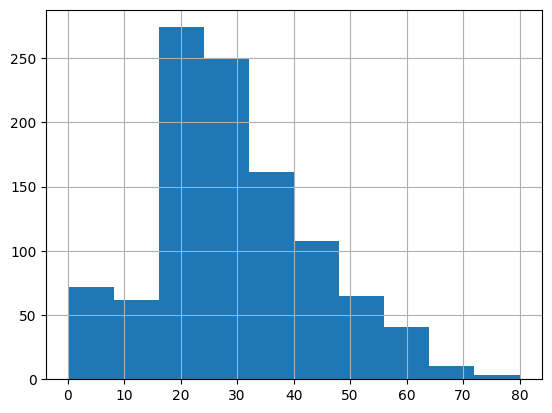

In [11]:
# 直方图
df["age"].hist()

In [13]:
# 唯一值
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [14]:
# 根据特征选择数据
df["name"].head()

,name
0,"Allen, Miss. Elisabeth Walton"
1,"Allison, Master. Hudson Trevor"
2,"Allison, Miss. Helen Loraine"
3,"Allison, Mr. Hudson Joshua Creighton"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"


In [15]:
# 筛选
df[df["sex"]=="female"].head() # 只有女性数据出现

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


In [16]:
# 排序
df.sort_values("age", ascending=False).head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


In [18]:
# Grouping（数据聚合与分组运算）
sex_group = df.groupby("survived")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sex_group[numeric_cols].mean()

,pclass,age,sibsp,parch,fare,survived
survived,,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831,0.0
1,1.962000,28.918228,0.462000,0.476000,49.361184,1.0


In [19]:
# iloc 根据位置的索引来访问
df.iloc[0, :] # iloc 在索引中的特定位置获取换行（或列）（因此他只需要整数）

,0
pclass,1
name,"Allen, Miss. Elisabeth Walton"
sex,female
age,29.0
sibsp,0
parch,0
ticket,24160
fare,211.3375
cabin,B5
embarked,S


In [20]:
# 获取指定位置的数据
df.iloc[0, 1]

'Allen, Miss. Elisabeth Walton'

In [21]:
# loc 根据标签的索引来访问
df.loc[0] # loc 从索引中获取具有特定标签的行(或列)

,0
pclass,1
name,"Allen, Miss. Elisabeth Walton"
sex,female
age,29.0
sibsp,0
parch,0
ticket,24160
fare,211.3375
cabin,B5
embarked,S


In [22]:
# 具有至少一个 NaN 值的行
df[pd.isnull(df).any(axis=1)].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


In [23]:
# 删除具有 Nan 值的行
df = df.dropna() # 删除具有 NaN 值的行
df = df.reset_index() # 重置行索引
df.head()

,index,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [30]:
# 删除多行
# axis=0：沿着 行 方向进行操作，也叫 按列操作。
# axis=1：沿着 列 方向进行操作，也叫 按行操作。
df = df.drop(["parch"], axis=1)
df.head()

,index,pclass,sex,age,fare,embarked,survived
0,0,1,female,29.0000,211.3375,S,1
1,1,1,male,0.9167,151.5500,S,1
2,2,1,female,2.0000,151.5500,S,0
3,3,1,male,30.0000,151.5500,S,0
4,4,1,female,25.0000,151.5500,S,0


In [40]:
# 映射特征值
df["sex"] = df["sex"].map({"male": 0, "female": 1}).fillna(2).astype(int)
df["embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2, "NaN": 3}).fillna(3).astype(int)
df.head()

,index,pclass,sex,age,fare,embarked,survived
0,0,1,2,29.0000,211.3375,3,1
1,1,1,2,0.9167,151.5500,3,1
2,2,1,2,2.0000,151.5500,3,0
3,3,1,2,30.0000,151.5500,3,0
4,4,1,2,25.0000,151.5500,3,0


In [41]:
# lambda 表达式创建新特征
def get_family_size(sibsp, parch):
  family_size = sibsp + parch
  return family
df["family_size"] = df[["sibsp", "parch"]].apply(lambda x: get_family_size(x["sibsp"], x["parch"]), axis=1)
df.head()

KeyError: "None of [Index(['sibsp', 'parch'], dtype='object')] are in the [columns]"

In [44]:
# 重新组织标题
df = df[['pclass', 'sex', 'age', 'fare', 'embarked', 'survived']]
df.head()

,pclass,sex,age,fare,embarked,survived
0,1,2,29.0000,211.3375,3,1
1,1,2,0.9167,151.5500,3,1
2,1,2,2.0000,151.5500,3,0
3,1,2,30.0000,151.5500,3,0
4,1,2,25.0000,151.5500,3,0


In [45]:
# 保存数据帧（dataframe）到 CSV
df.to_csv("processed_titanic.csv", index=False)

In [46]:
# 看你一下你保持的文件
!ls -l

total 96
-rw-r--r-- 1 root root  5331 Jan  4 07:38 processed_titanic.csv
drwxr-xr-x 1 root root  4096 Jan  2 14:19 sample_data
-rw-r--r-- 1 root root 85153 Jan  4 07:05 titanic.csv
